## Bank Marketing Dataset Analysis

This jupyter notebook performs a analysis of a bank marketing dataset that can be found in the following kaggle link: [**Bank Marketing Dataset**](https://www.kaggle.com/janiobachmann/bank-marketing-dataset).

To enhance the final product of the analysis different other kaggle sources were examined and incorporated. Therefore credit is due to the following authors:
- [Bank Marketing Campaign || Opening a Term Deposit by Janio Martinez Bachmann](https://www.kaggle.com/code/janiobachmann/bank-marketing-campaign-opening-a-term-deposit)
- [Bank Marketing Analysis by Aleksandra Deis](https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis)
- [Bank Customer Segmentation by Rhythm Shah](https://www.kaggle.com/code/rhythmshah11/bank-customer-segmentation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold
from plotly import tools
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

Read the dataset

In [2]:
file_path = "bank.csv"
df = pd.read_csv(file_path)
print(df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


Description of the dataset

In [3]:
print("Bank marketing dataset consists of {rows} rows.".format(rows = len(df)))
df.describe()

Bank marketing dataset consists of 11162 rows.


,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Verify null values

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Information on the y target variable
Fairly balanced dataset so we can use accuracy as a measure

<Axes: title={'center': 'Information on Deposit Suscriptions'}, ylabel='count'>

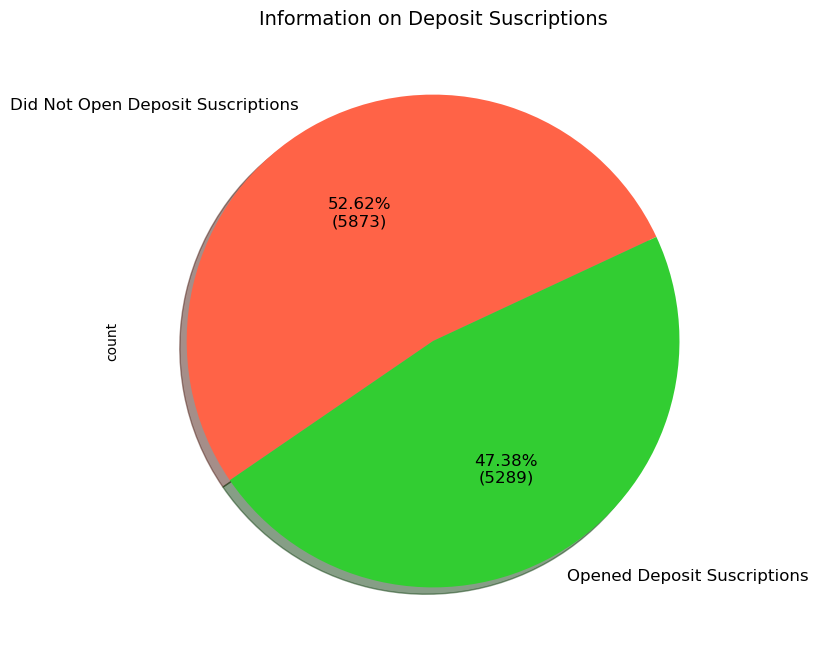

In [5]:
y_counts = df["deposit"].value_counts()
f, ax = plt.subplots(figsize=(8,8))

colors = ["tomato", "limegreen"]
labels ="Did Not Open Deposit Suscriptions", "Opened Deposit Suscriptions"

plt.title('Information on Deposit Suscriptions', fontsize=14)

y_counts.plot.pie(
  autopct=lambda pct: '{:.2f}%\n({})'.format(pct, int(round(pct*sum(y_counts)/100.0))),
  ax=ax, shadow=True, colors=colors, labels=labels, fontsize=12, startangle=25
)

# Adapted of Janio Martinez Bachmann's code

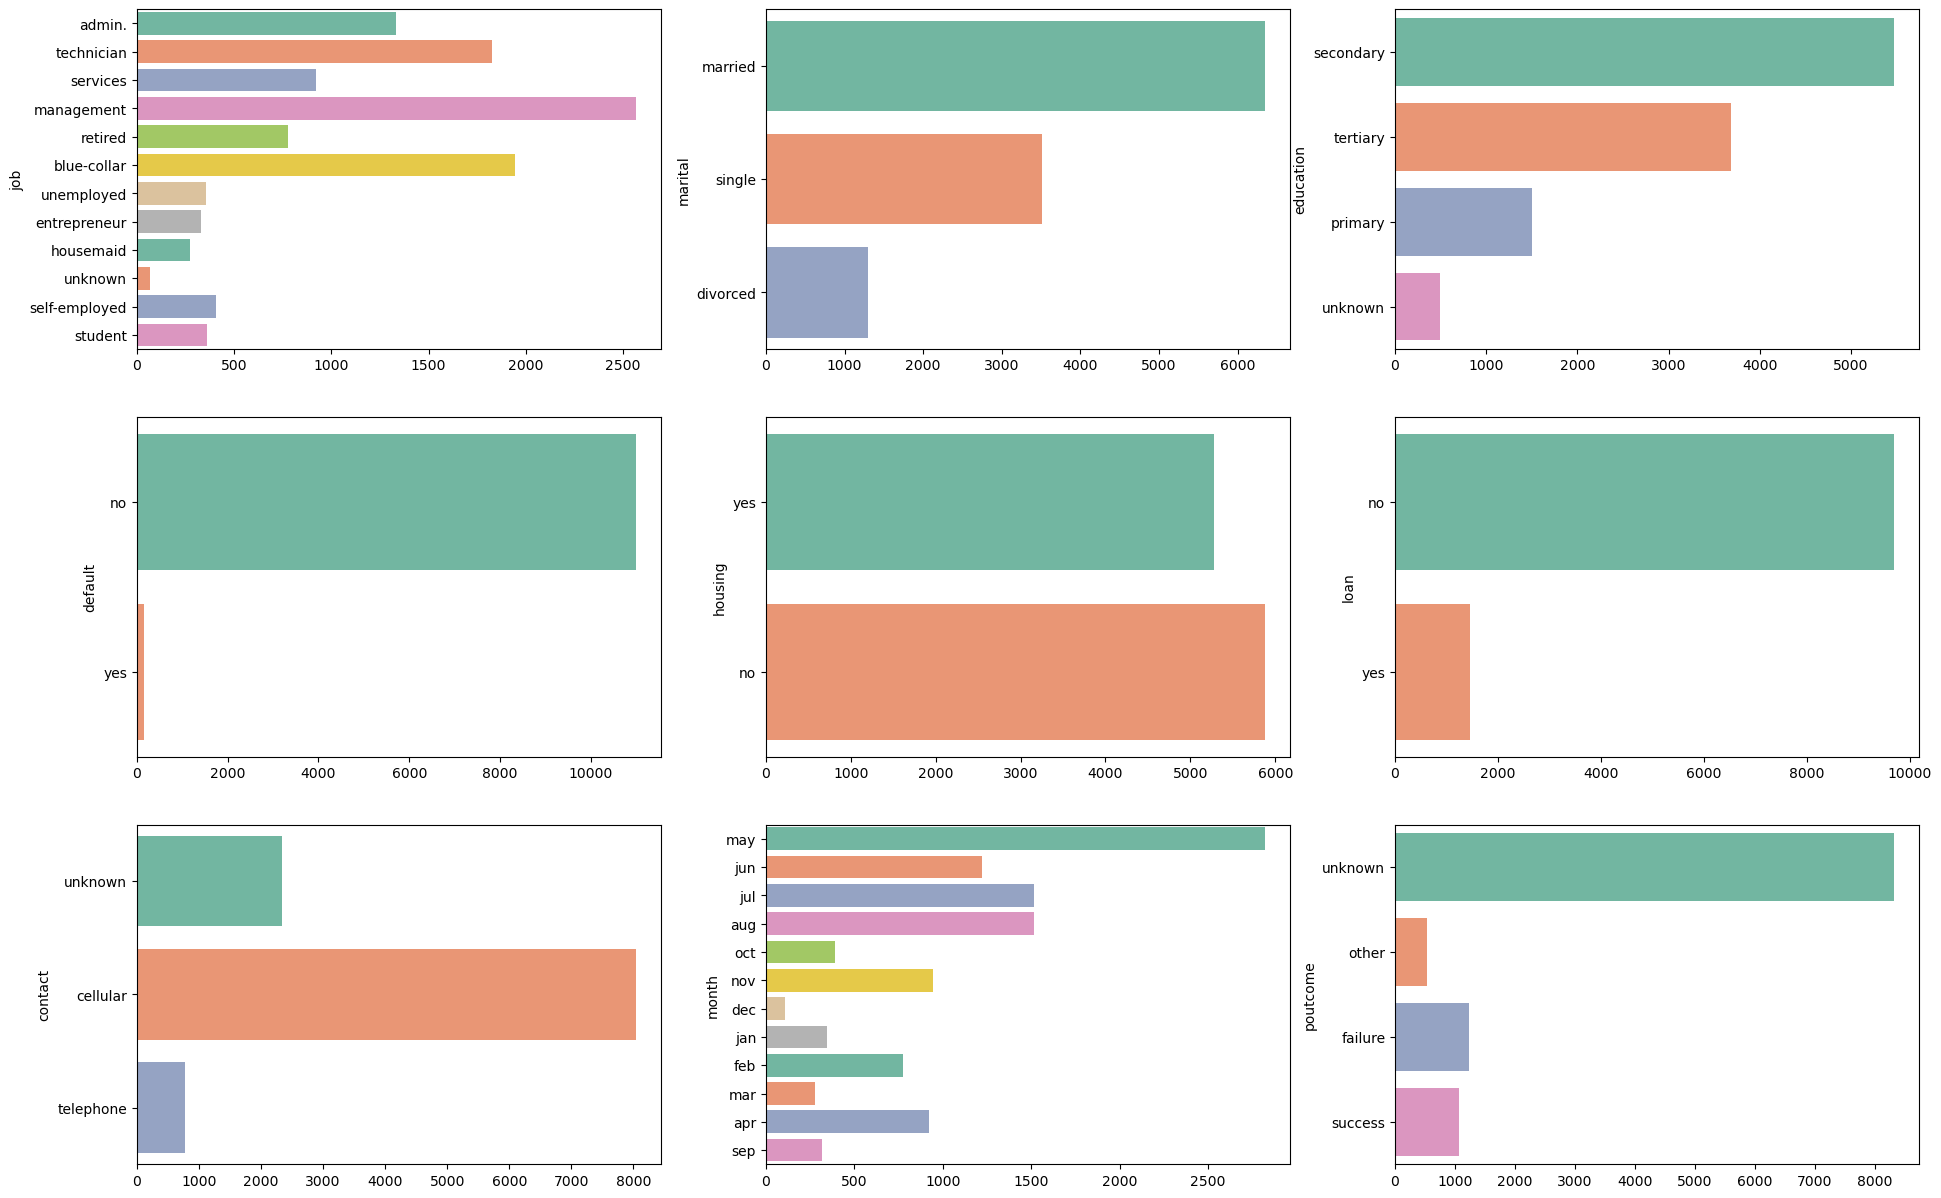

In [6]:
# Distribution Categorical Data
categorical_columns = df.columns[df.dtypes == 'object']
categorical_columns = categorical_columns.drop("deposit")

fig, ax = plt.subplots(3, 3, figsize=(23, 15))
for variable, subplot in zip(categorical_columns, ax.flatten()):
  sns.countplot(y=df[variable], ax=subplot, hue=df[variable], palette="Set2", legend=False)
  subplot.set(xlabel=None)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

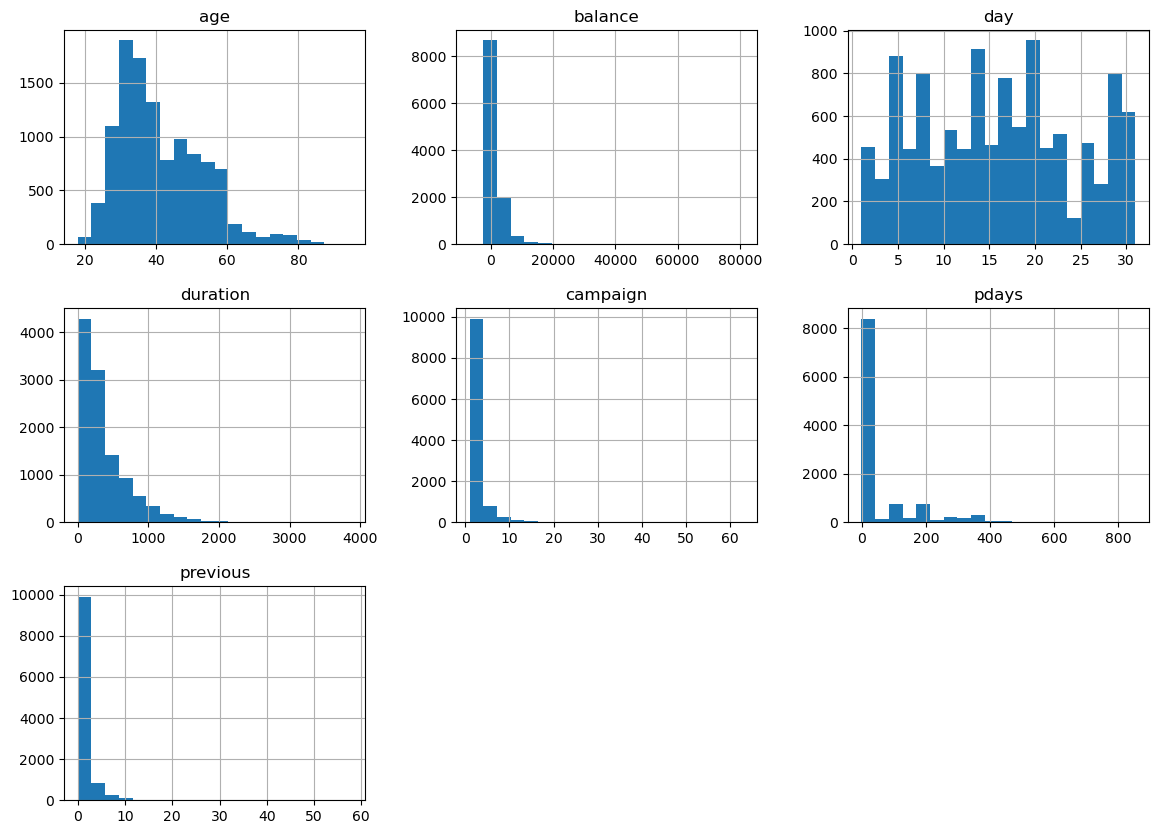

In [7]:
# Distribution Numerical Data
df.hist(bins=20, figsize=(14,10))

Text(0.5, 1.0, 'Number of Occupations')

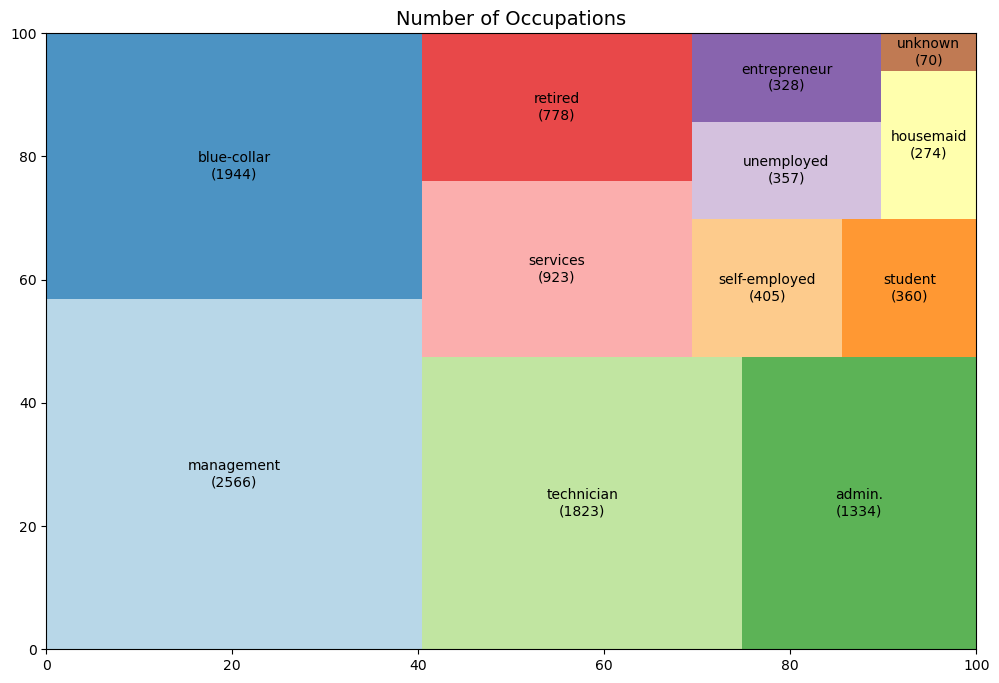

In [8]:
job_value_counts = df['job'].value_counts()
plt.figure(figsize=(12,8))
sq.plot(sizes=job_value_counts.values, alpha=.8, color=sns.color_palette("Paired", job_value_counts.size),
  label=[f"{job}\n({count})" for job, count in zip(job_value_counts.index, job_value_counts.values)], 
)
plt.title('Number of Occupations', fontsize=14)

### Distribution of Ages by Occupation

Usually retired people are older.
Student people are younger. 

In [9]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["deposit"] == "yes"]

occupations = df["job"].unique().tolist()

ages_by_job = {job: suscribed_df["age"].loc[suscribed_df["job"] == job].values for job in occupations}

occupations = ages_by_job.keys()
ages = ages_by_job.values()

colors = [
    'rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)', 
    'rgba(255, 65, 54, 0.5)',  'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
    'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)', 'rgba(174, 229, 56, 0.5)', 
    'rgba(229, 56, 56, 0.5)', 'rgba(54, 162, 235, 0.5)', 'rgba(255, 99, 132, 0.5)'
]

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(autorange=True,showgrid=True,zeroline=True,dtick=5,gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(l=40,r=30,b=80,t=100),
    plot_bgcolor='rgb(251,251,251)',
    paper_bgcolor='rgb(224,255,246)',
    showlegend=False
)


fig = go.Figure(data=traces, layout=layout)
iplot(fig)

# Based on Janio Martinez Bachmann's code

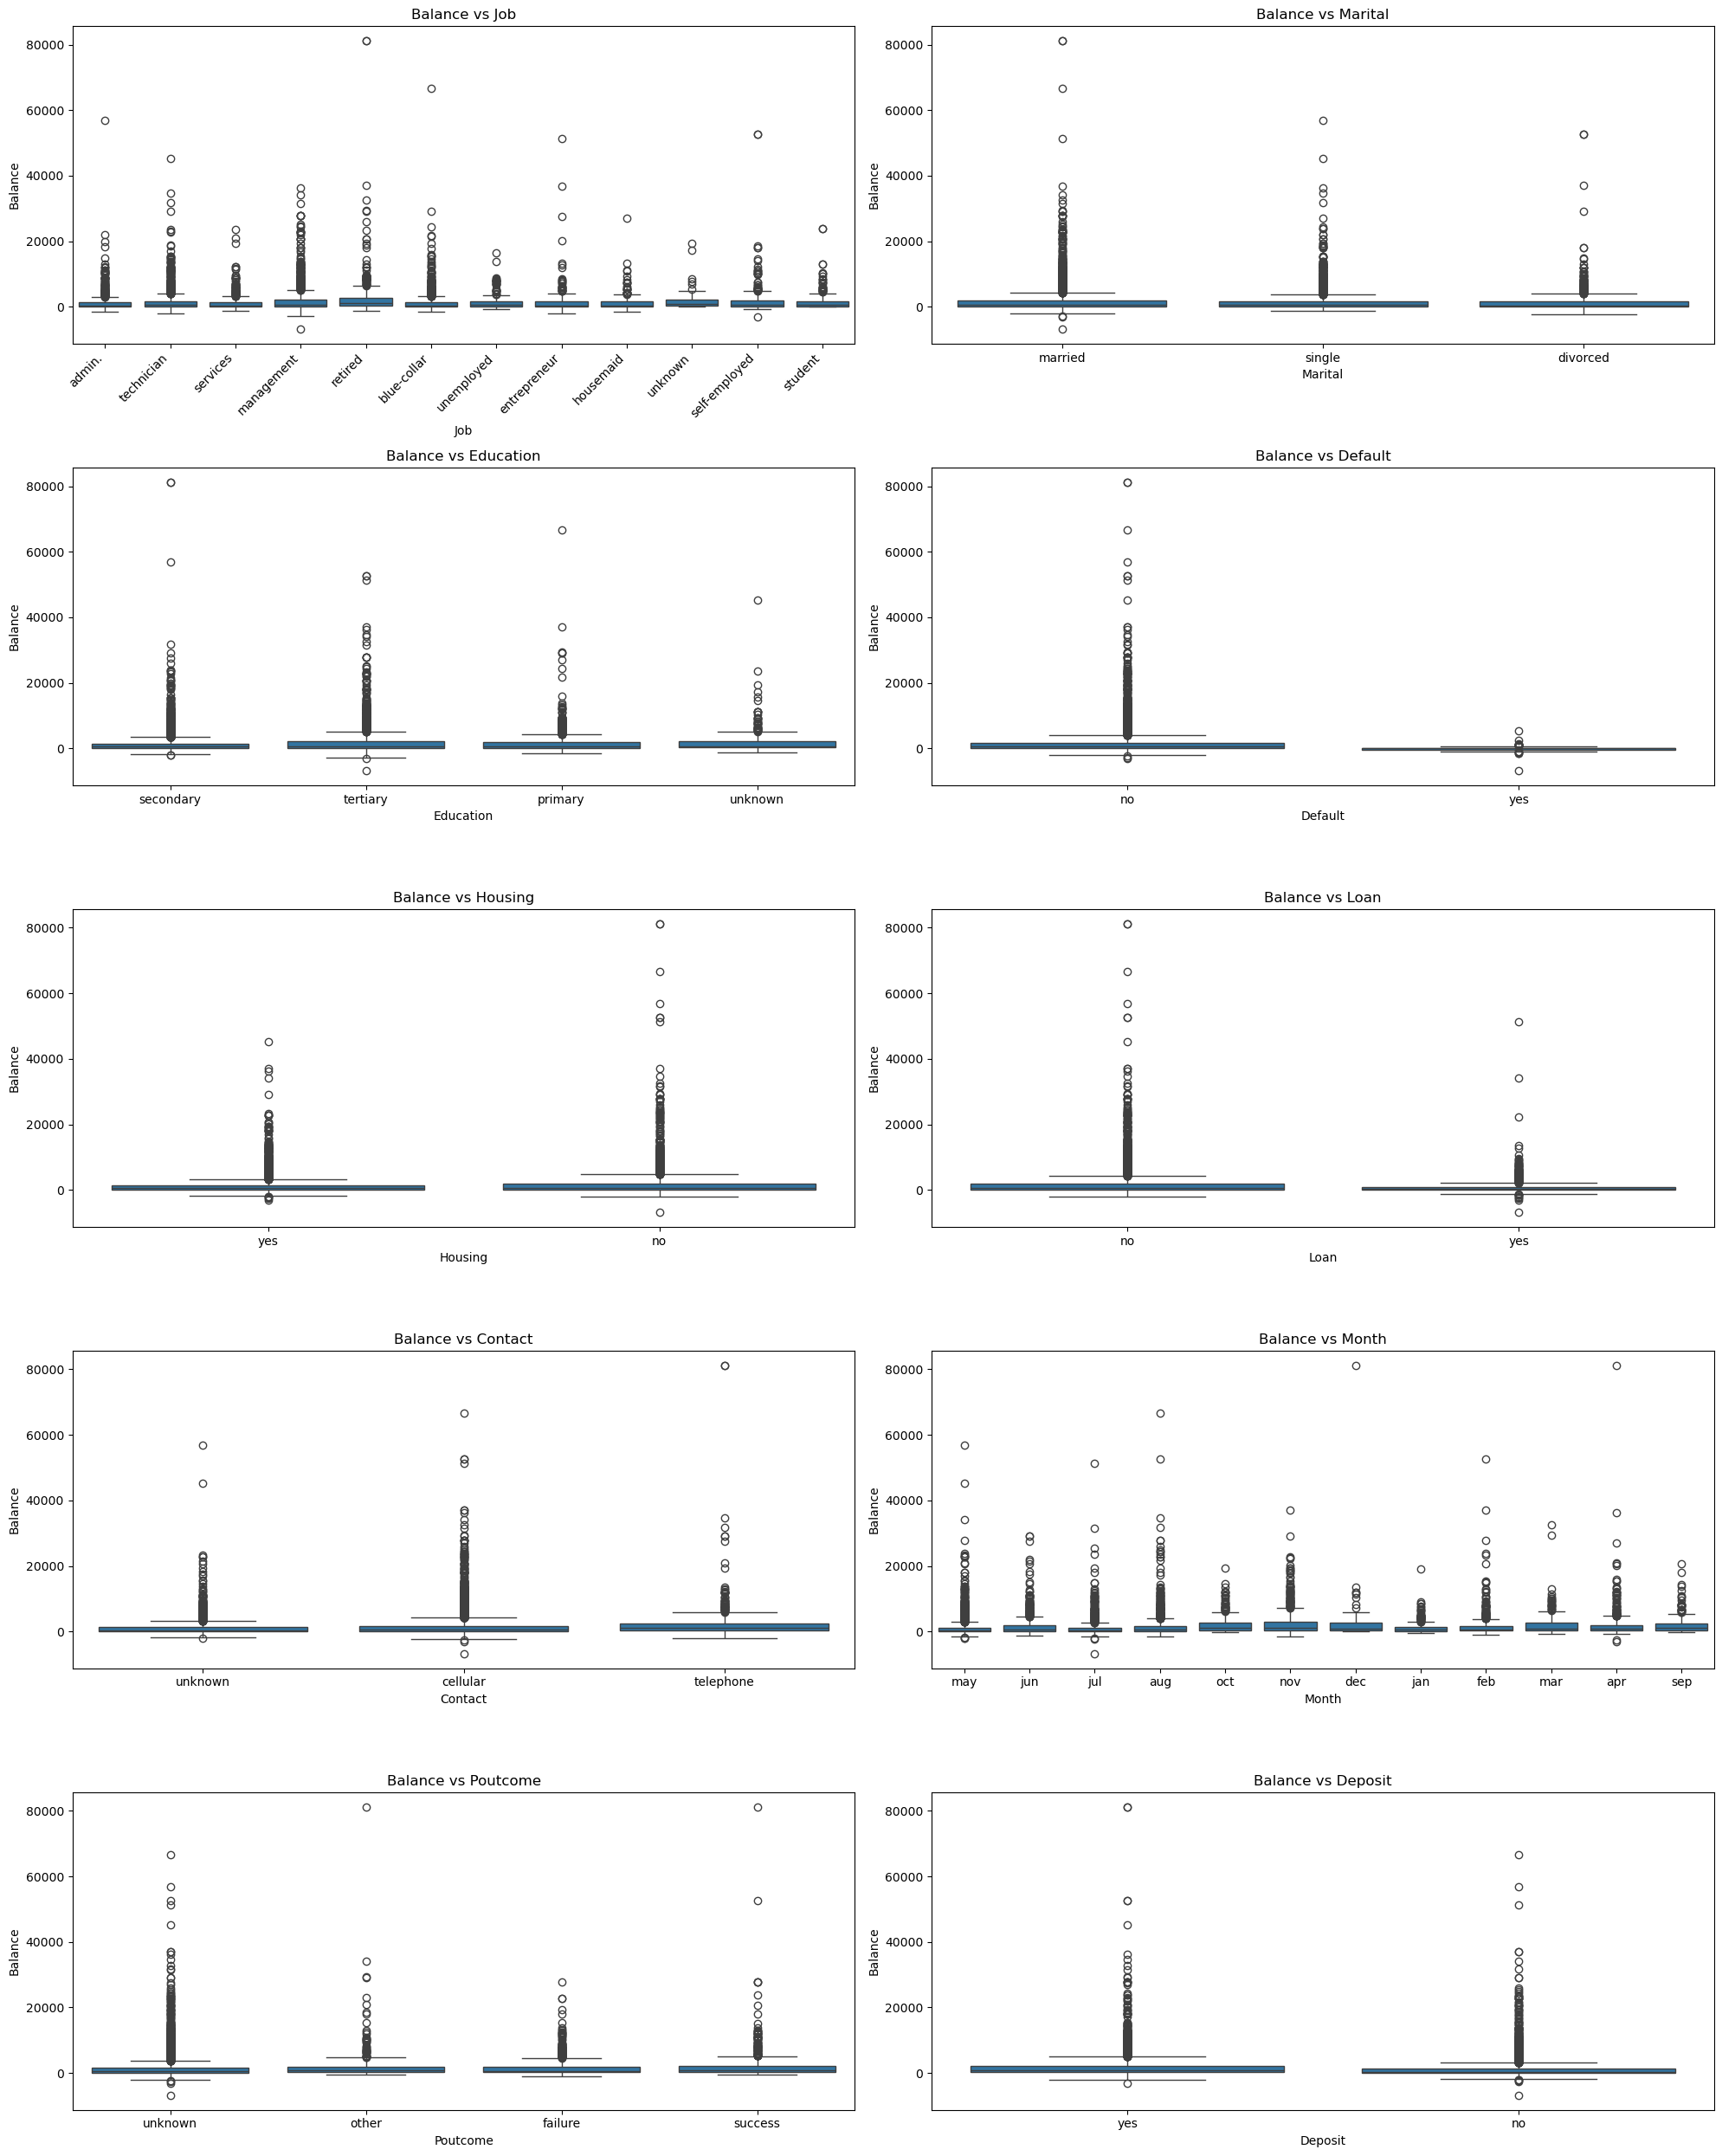

In [10]:
# List of features to plot against balance
features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
axes = axes.flatten()

# Plot each feature against balance
for i, feature in enumerate(features):
  sns.boxplot(x=feature, y='balance', data=df, ax=axes[i])
  axes[i].set_title(f'Balance vs {feature.capitalize()}')
  axes[i].set_xlabel(feature.capitalize())
  axes[i].set_ylabel('Balance')

for label in axes[0].get_xticklabels():
  label.set_rotation(45)
  label.set_ha('right')

plt.tight_layout()
plt.show()

In [11]:
df_copy = df.copy()
df_copy["balance_status"] = np.nan
df_copy["balance_status"] = df_copy["balance_status"].astype(object)

lst = [df_copy]
for col in lst:
  col.loc[col["balance"] < 0, "balance_status"] = "negative"
  col.loc[(col["balance"] >= 0) & (col["balance"] <= 30000), "balance_status"] = "low"
  col.loc[(col["balance"] > 30000) & (col["balance"] <= 40000), "balance_status"] = "middle"
  col.loc[col["balance"] > 40000, "balance_status"] = "high"

negative = df_copy["balance"].loc[df_copy["balance_status"] == "negative"].values.tolist()
low = df_copy["balance"].loc[df_copy["balance_status"] == "low"].values.tolist()
middle = df_copy["balance"].loc[df_copy["balance_status"] == "middle"].values.tolist()
high = df_copy["balance"].loc[df_copy["balance_status"] == "high"].values.tolist()

# Get the average by occupation in each balance category
job_balance = df_copy.groupby(['job', 'balance_status'])['balance'].mean().reset_index()
balance_status_order = ['negative', 'low', 'middle', 'high']
job_balance['balance_status'] = pd.Categorical(job_balance['balance_status'], categories=balance_status_order, ordered=True)
job_balance = job_balance.sort_values(['job', 'balance_status'])

fig = px.bar(
    job_balance, 
    x='job', 
    y='balance',
    category_orders={"balance_status": balance_status_order},
    color='balance_status', 
    barmode='group',
    title='Mean Balance in Account by Job Occupation',
    labels={'balance': 'Mean Balance (€)', 'job': 'Job Occupation', 'balance_status': 'Balance Category'},
    color_discrete_map={
        'negative': 'rgb(246, 46, 46)', 
        'low': 'rgb(246, 97, 46)', 
        'middle': 'rgb(246, 179, 46)', 
        'high': 'rgb(46, 246, 78)'
    }
)

# Customize the layout
fig.update_layout(
  legend_title_text='Balance Category',
  xaxis_tickangle=-45,
  yaxis_title='Mean Balance (€)',
  font=dict(size=12),
  legend=dict(font=dict(size=12)),
)

fig.show()

# Changed from Janio Martinez Bachmann's code

Clustering Marital Status and Education


Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

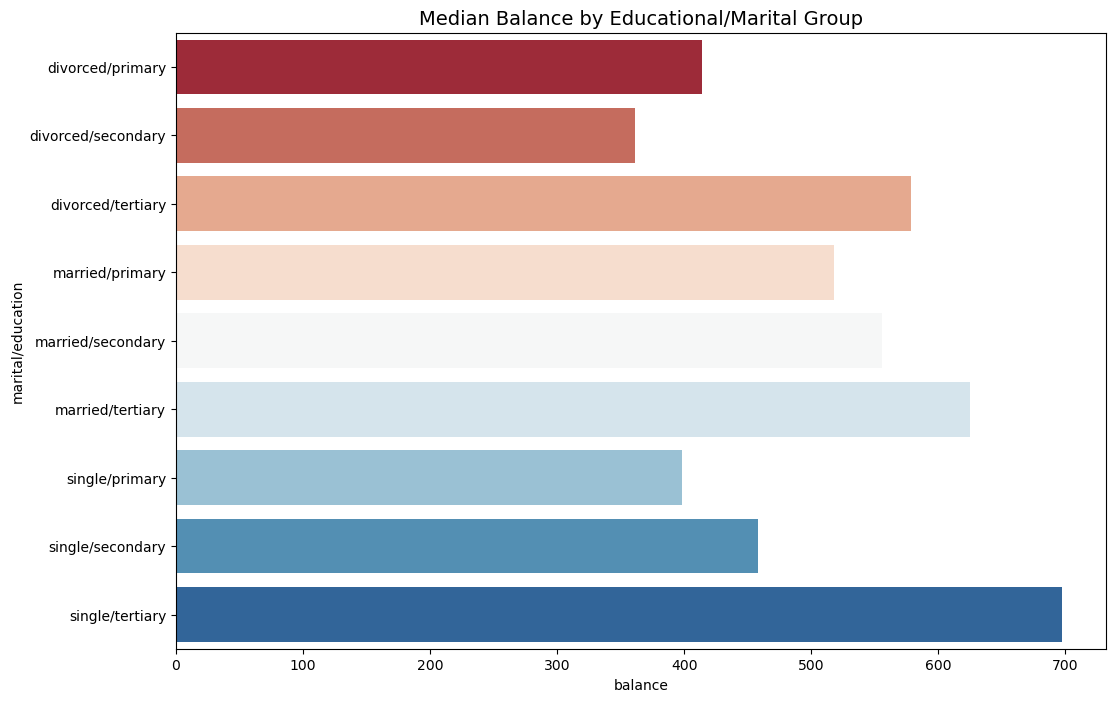

In [12]:
df_copy = df.copy()
df['marital/education'] = np.nan
df['marital/education'] = df['marital/education'].astype(object)
lst = [df_copy]
for col in lst:
  col.loc[(col['marital'] == 'single') & (df_copy['education'] == 'primary'), 'marital/education'] = 'single/primary'
  col.loc[(col['marital'] == 'married') & (df_copy['education'] == 'primary'), 'marital/education'] = 'married/primary'
  col.loc[(col['marital'] == 'divorced') & (df_copy['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
  col.loc[(col['marital'] == 'single') & (df_copy['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
  col.loc[(col['marital'] == 'married') & (df_copy['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
  col.loc[(col['marital'] == 'divorced') & (df_copy['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
  col.loc[(col['marital'] == 'single') & (df_copy['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
  col.loc[(col['marital'] == 'married') & (df_copy['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
  col.loc[(col['marital'] == 'divorced') & (df_copy['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'

education_groups = df_copy.groupby(['marital/education'], as_index=False)['balance'].median()
fig = plt.figure(figsize=(12,8))

sns.barplot(
  x="balance", y="marital/education", data=education_groups,
  label="Total", palette="RdBu", hue="marital/education"
)

plt.title('Median Balance by Educational/Marital Group', fontsize=14)

# Based on Janio Martinez Bachmann's code


In [13]:
loan_balance = df_copy.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()
no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values

labels = loan_balance['marital/education'].unique().tolist()

trace0 = go.Scatter(
  x=no_loan,
  y=labels,
  mode='markers',
  name='No Loan',
  marker=dict(
    color='rgb(175,238,238)',
    line=dict(
      color='rgb(0,139,139)',
      width=1,
    ),
    symbol='circle',
    size=16,
  )
)
trace1 = go.Scatter(
  x=has_loan,
  y=labels,
  mode='markers',
  name='Has a Previous Loan',
  marker=dict(
    color='rgb(250,128,114)',
    line=dict(
      color='rgb(178,34,34)',
      width=1,
    ),
    symbol='circle',
    size=16,
  )
)

data = [trace0, trace1]
layout = go.Layout(
  title="The Impact of Loans to Married/Educational Clusters",
  xaxis=dict(
    showgrid=False,
    showline=True,
    linecolor='rgb(102, 102, 102)',
    titlefont=dict(
      color='rgb(204, 204, 204)'
    ),
    tickfont=dict(
      color='rgb(102, 102, 102)',
    ),
    showticklabels=False,
    dtick=10,
    ticks='outside',
    tickcolor='rgb(102, 102, 102)',
  ),
  margin=dict(
    l=140,
    r=40,
    b=50,
    t=80
  ),
  legend=dict(
    font=dict(
        size=10,
    ),
    yanchor='middle',
    xanchor='right',
  ),
  width=1000,
  height=800,
  paper_bgcolor='rgb(255,250,250)',
  plot_bgcolor='rgb(255,255,255)',
  hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

# Based on Janio Martinez Bachmann's code

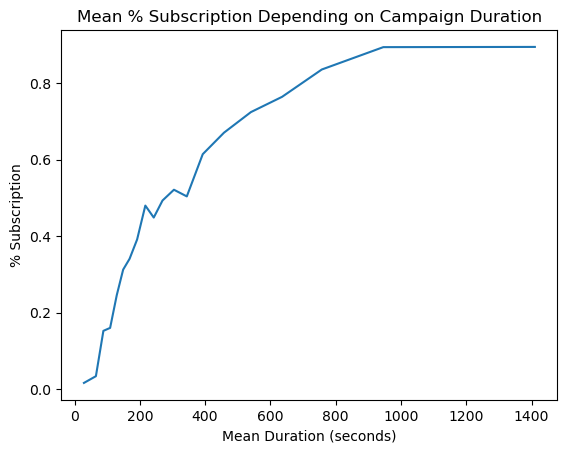

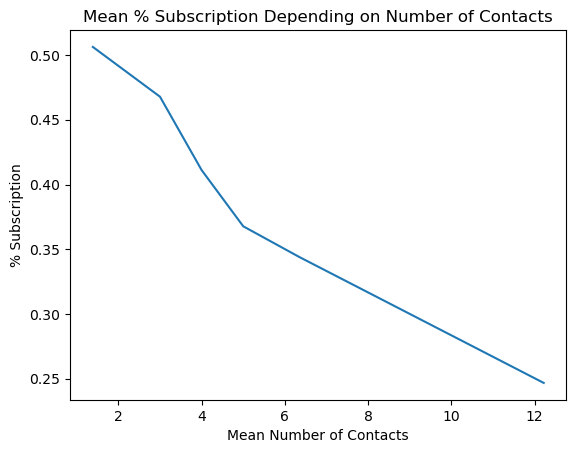

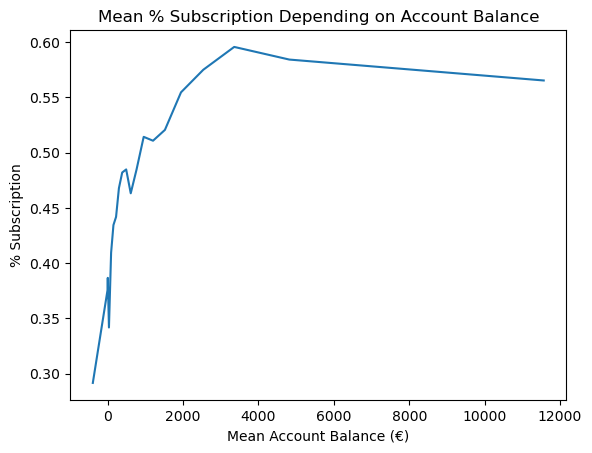

In [14]:
df_copy = df.copy()

# Convert deposit outcome to a binary column if not already
df_copy['deposit_bool'] = (df_copy['deposit'] == 'yes').astype(int)

# Create duration buckets
df_copy['duration_buckets'] = pd.qcut(df_copy['duration'], 20, labels=False, duplicates='drop')

# Calculate mean subscription rate and mean duration per bucket
mean_duration = df_copy.groupby(['duration_buckets'])['deposit_bool'].mean()
mean_duration_values = df_copy.groupby(['duration_buckets'])['duration'].mean()

# Plot
plt.plot(mean_duration_values, mean_duration.values)
plt.title('Mean % Subscription Depending on Campaign Duration')
plt.xlabel('Mean Duration (seconds)')
plt.ylabel('% Subscription')
plt.show()

df_copy['campaign_buckets'] = pd.qcut(df_copy['campaign'], 20, labels=False, duplicates='drop')

# Calculate mean subscription rate and mean number of contacts per bucket
mean_campaign = df_copy.groupby(['campaign_buckets'])['deposit_bool'].mean()
mean_campaign_values = df_copy.groupby(['campaign_buckets'])['campaign'].mean()

# Plot
plt.plot(mean_campaign_values, mean_campaign.values)
plt.title('Mean % Subscription Depending on Number of Contacts')
plt.xlabel('Mean Number of Contacts')
plt.ylabel('% Subscription')
plt.show()

# Create balance buckets
df_copy['balance_buckets'] = pd.qcut(df_copy['balance'], 20, labels=False, duplicates='drop')

# Calculate mean subscription rate and mean account balance per bucket
mean_balance = df_copy.groupby(['balance_buckets'])['deposit_bool'].mean()
mean_balance_values = df_copy.groupby(['balance_buckets'])['balance'].mean()

# Plot
plt.plot(mean_balance_values, mean_balance.values)
plt.title('Mean % Subscription Depending on Account Balance')
plt.xlabel('Mean Account Balance (€)')
plt.ylabel('% Subscription')
plt.show()

# Changed from Aleksandra Deis's code


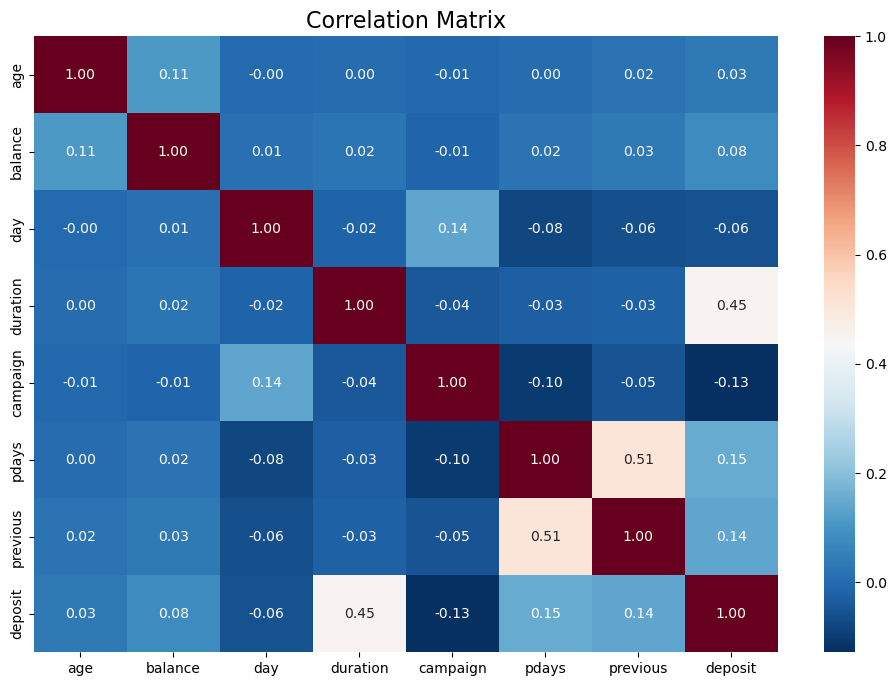

In [17]:
fig = plt.figure(figsize=(12,8))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])



# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r", annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix", fontsize=16)
plt.show()

# From Janio Martinez Bachmann's code